# Visualization of a dataset with multi digits

In [370]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [371]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [372]:
from src.load_data import load_mnist, sample_uniformly_imgs #, load_imagenet
from src.utils import downsample_img, crop_digit
from src.create_data import overlay_small_img_on_large_img_at_random_position

In [373]:
import importlib
import src
importlib.reload(src.create_data)
from src.create_data import overlay_small_img_on_large_img_at_random_position

In [374]:
seed = 4
n_sampled_digits = 2

mnist_dataset_train, mnist_dataset_test = load_mnist()

sampled_digit_images = sample_uniformly_imgs(
    mnist_dataset_train, n_sampled_digits, seed)

first_digit = sampled_digit_images[0]
second_digit = sampled_digit_images[1]

In [375]:
canvas_height = 112
canvas_width = 112
canvas = np.zeros((canvas_height, canvas_width))

min_size = 20
max_size = 80
scale = 10
size_first_digit = min_size
size_second_digit = np.random.randint(
    min_size / scale, (max_size / scale) + 1) * scale
print(f"The size of the first digit is ({size_first_digit, size_first_digit})")
print(f"The size of the second digit is ({size_second_digit, size_second_digit})")

The size of the first digit is ((20, 20))
The size of the second digit is ((80, 80))


## Set the proper dimensions

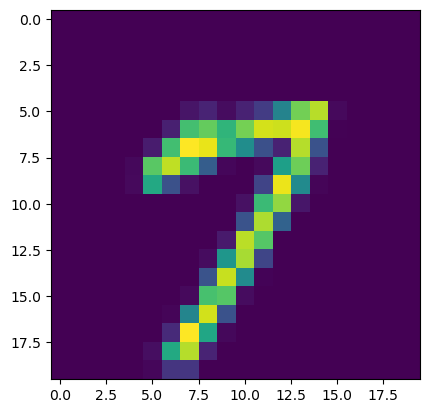

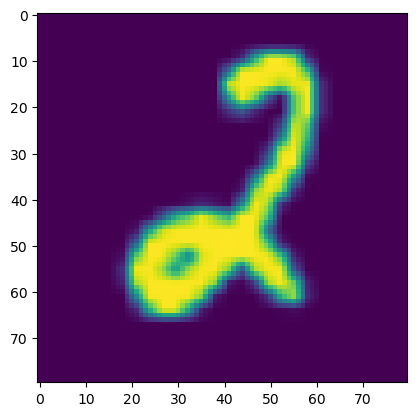

In [376]:
first_digit = downsample_img(first_digit, size_first_digit,
                             size_first_digit, grayscale=True)
second_digit = downsample_img(second_digit, size_second_digit,
                              size_second_digit, grayscale=True)
plt.imshow(first_digit)
plt.show()
plt.imshow(second_digit)
plt.show()

## Cropping out the background

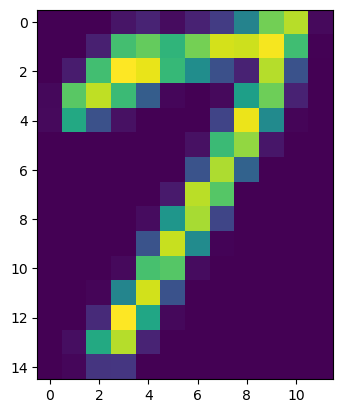

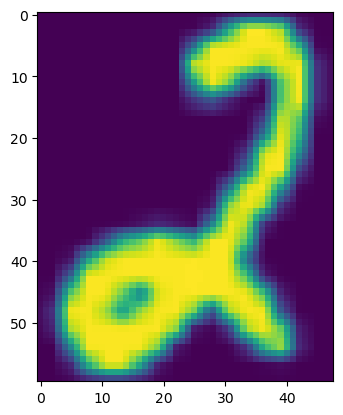

In [377]:
first_digit_cropped = crop_digit(first_digit, plot=True)
second_digit_cropped = crop_digit(second_digit, plot=True)

# TODO: should we also take into account rotation of digits?
###  The paper doesn't seem to apply it

54 53
30
24
(60, 48)
24
84
29
77


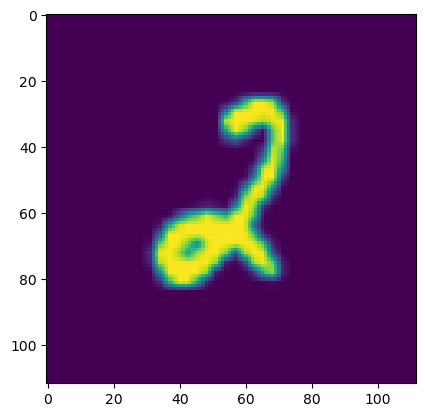

In [378]:
overlay_small_img_on_large_img_at_random_position(canvas, second_digit_cropped)
plt.imshow(canvas)
plt.show()